# Import


In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt




# test

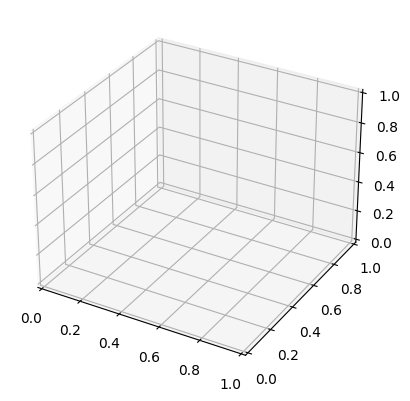

In [2]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# 3D

## constantes

In [21]:
R = 5.3
n = 2
m = 1.92
L_AV = 6.8
L_AR = 5
X_M = 3


## functions

In [27]:
def f_AV(x,y) :
    r = np.sqrt(x**2+y**2)
    if r <= L_AV + X_M and X_M <= r :
        return R * (1-((r-X_M)/L_AV)**m)**(1/m)
    else :
        return np.nan
    
def g_AV(x,y) :
    return -f_AV(x,y)

In [32]:
def compute_grid(X,Y,Z,func):
    i = 0
    j = 0
    for coorZip in zip (X,Y) :
        j = 0
        for coor in zip(coorZip[0],coorZip[1]):
            Z[i,j] = func(coor[0],coor[1])
            j = j + 1
        i = i + 1
    

## graph

In [37]:
N = 300
x_AV = np.linspace(X_M,X_M+L_AV,N)
y_AV = np.linspace(X_M,X_M+L_AV,N)

X, Y = np.meshgrid(x_AV, y_AV)
Y_neg = -Y
Z1 = np.zeros(X.shape)
Z2 = np.zeros(X.shape)
Z3 = np.zeros(X.shape)
Z4 = np.zeros(X.shape)

compute_grid(X,Y,Z1,f_AV)
compute_grid(X,Y,Z2,g_AV)
compute_grid(X,Y_neg,Z3,f_AV)
compute_grid(X,Y_neg,Z4,g_AV)


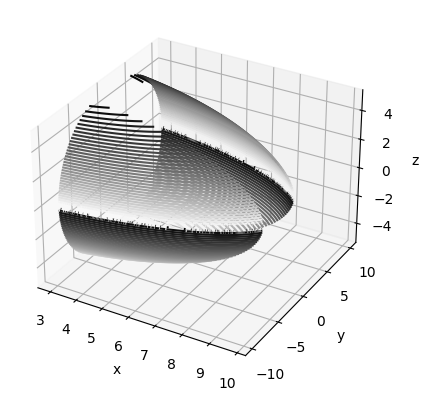

In [39]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z1, 50, cmap='binary')
ax.contour3D(X, Y, Z2, 50, cmap='binary')
ax.contour3D(X, Y_neg, Z3, 50, cmap='binary')
ax.contour3D(X, Y_neg, Z4, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.show()